#### **This Notebook Explores the Use of Dimensionality Reduction through PCA and LDA**

In [70]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GroupKFold, cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC

In [71]:
#df = pd.read_csv("../data/exosomes.raw_spectrum_1.csv")
#df = pd.read_csv("../data/exosomes.raw_spectrum_380-1800.csv")
#df = pd.read_csv("../data/exosomes.raw_spectrum_400-1800.csv")
#df = pd.read_csv("../data/current_clean_spectrum.csv")
df = pd.read_csv("../data/standard_cleaning.csv")


In [72]:
df

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,201210-1-00,293,400.22778,201210-1,Normal,0.010818
1,201210-1-00,294,400.91116,201210-1,Normal,0.010550
2,201210-1-00,295,401.59454,201210-1,Normal,0.010328
3,201210-1-00,296,402.27789,201210-1,Normal,0.010151
4,201210-1-00,297,402.96127,201210-1,Normal,0.010019
...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,210526-3,Hyperglycemia,0.013431
6239201,210526-3-09,2338,1797.72200,210526-3,Hyperglycemia,0.013375
6239202,210526-3-09,2339,1798.40550,210526-3,Hyperglycemia,0.013260
6239203,210526-3-09,2340,1799.08890,210526-3,Hyperglycemia,0.013085


<AxesSubplot: xlabel='WaveNumber', ylabel='Absorbance'>

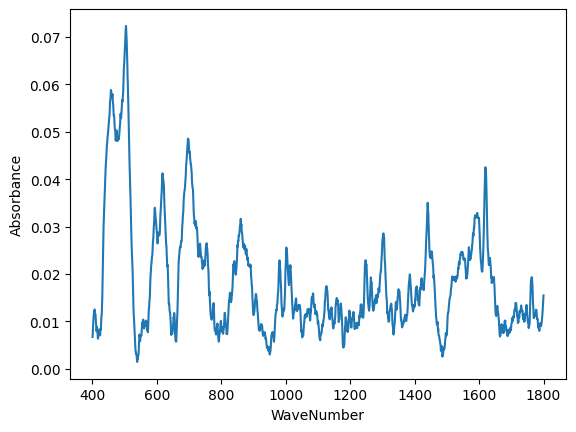

In [73]:
sample = df[df['SpecID'] == "201210-1-07"]
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)

In [74]:
def prepare_wavelength_df(df, absorbance_col, status_col='Status'):

    # Pivot the DataFrame to get wavelengths as columns and absorbance values
    wavelength_df = df.pivot(index='SpecID', columns='WaveNumber', values=absorbance_col).reset_index()
    wavelength_df.columns.name = None

    # Merge with the statuses based on SpecID
    # Include the SurID to perform GroupKFold CV
    statuses_and_surface = df[['SpecID', 'SurID', status_col]].drop_duplicates()
    wavelength_df = pd.merge(wavelength_df, statuses_and_surface, on='SpecID')

    # Set SpecID as the index
    wavelength_df = wavelength_df.set_index('SpecID')

    return wavelength_df

In [75]:
def evaluate_extra_trees(df):

    # Set the Surfaces as groups
    groups = df['SurID']
    X = df.drop(['Status', 'SurID'], axis=1)
    y = df['Status']

    # Creating the Extra Trees classifier
    et = ExtraTreesClassifier(random_state=1234)
    
    # Using GroupKFold for classification tasks
    cv = GroupKFold(n_splits=10)
    
    # Getting cross-validation scores
    scores = cross_val_score(et, X, y, cv=cv, scoring='accuracy',groups=groups, n_jobs=-1)
    
    # Displaying the results
    print(f'{et.__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

In [82]:
def evaluate_svm(df):

    # Set the Surfaces as groups
    groups = df['SurID']
    X = df.drop(['Status', 'SurID'], axis=1)
    y = df['Status']

    # Creating the Extra Trees classifier
    svc = SVC(random_state=1234)
    
    # Using GroupKFold for classification tasks
    cv = GroupKFold(n_splits=10)
    
    # Getting cross-validation scores
    scores = cross_val_score(svc, X, y, cv=cv, scoring='accuracy',groups=groups, n_jobs=-1)
    
    # Displaying the results
    print(f'{svc.__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

In [77]:
wavelength_df = prepare_wavelength_df(df, 'Absorbance')

In [78]:
wavelength_df.head()

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,SurID,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,0.010818,0.010550,0.010328,0.010151,0.010019,0.009933,0.009892,0.009896,0.009946,0.010041,...,0.013703,0.013284,0.012738,0.012063,0.011261,0.010331,0.009274,0.008088,201210-1,Normal
201210-1-01,0.004610,0.004910,0.005205,0.005495,0.005779,0.006057,0.006331,0.006598,0.006861,0.007118,...,0.012393,0.012502,0.012602,0.012692,0.012772,0.012844,0.012905,0.012958,201210-1,Normal
201210-1-02,0.005076,0.004427,0.003850,0.003345,0.002912,0.002551,0.002261,0.002043,0.001897,0.001823,...,0.005858,0.005990,0.006156,0.006358,0.006594,0.006866,0.007173,0.007515,201210-1,Normal
201210-1-03,0.002405,0.002578,0.002725,0.002848,0.002946,0.003020,0.003068,0.003092,0.003091,0.003065,...,0.003191,0.003324,0.003500,0.003719,0.003981,0.004285,0.004631,0.005021,201210-1,Normal
201210-1-04,0.018220,0.016544,0.014988,0.013553,0.012237,0.011043,0.009968,0.009014,0.008180,0.007467,...,0.011625,0.011914,0.012226,0.012560,0.012917,0.013297,0.013700,0.014125,201210-1,Normal


Show the performance of the current approach.

In [79]:
evaluate_extra_trees(wavelength_df)

ExtraTreesClassifier Cross-Validation Accuracy: 0.5518 +/- 0.1151


In [83]:
evaluate_svm(wavelength_df)

SVC Cross-Validation Accuracy: 0.5575 +/- 0.0972


##### **PCA**

In [84]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Create a pipeline with PCA and Extra Trees classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=50)),
    ('classifier', ExtraTreesClassifier(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Getting cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

ExtraTreesClassifier Cross-Validation Accuracy: 0.5200 +/- 0.0900


In [89]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Create a pipeline with PCA and Extra Trees classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=100)),
    ('classifier', SVC(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Getting cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

SVC Cross-Validation Accuracy: 0.5440 +/- 0.1031


##### **LDA**

In [90]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Updated pipeline with LDA
pipeline = Pipeline([
    ('lda', LDA()),
    ('classifier', ExtraTreesClassifier(random_state=1234))
])

# Using GroupKFold for classification tasks with the updated pipeline
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results for LDA
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy with LDA: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

ExtraTreesClassifier Cross-Validation Accuracy with LDA: 0.4270 +/- 0.0389


In [92]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Updated pipeline with LDA
pipeline = Pipeline([
    ('lda', LDA()),
    ('classifier', SVC(random_state=1234))
])

# Using GroupKFold for classification tasks with the updated pipeline
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results for LDA
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy with LDA: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

SVC Cross-Validation Accuracy with LDA: 0.3990 +/- 0.0444


##### **PCA + LDA**

In [95]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Create a pipeline with PCA, LDA and Extra Trees classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=50)),  # First, apply PCA
    ('lda', LDA()),                  # Then apply LDA
    ('classifier', ExtraTreesClassifier(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Getting cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy with PCA and LDA: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

ExtraTreesClassifier Cross-Validation Accuracy with PCA and LDA: 0.4736 +/- 0.0837


In [106]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Create a pipeline with PCA, LDA and Extra Trees classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=50)),  # First, apply PCA
    ('lda', LDA()),                  # Then apply LDA
    ('classifier', SVC(random_state=1234, C=10000))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Getting cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy with PCA and LDA: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')